In [97]:
# Usar keras 2.2.5
# conda install -c conda-forge keras=2.2.5

In [98]:
import keras
keras.__version__

'2.4.3'

In [99]:
import numpy as np
np.__version__

'1.20.3'

In [104]:
from keras.datasets import imdb as dataset
#from keras.datasets import reuters as dataset
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Cargamos y analizamos el dataset

In [105]:
# Primer hyperparámetro
num_words=10000

(training_data, training_targets), (testing_data, testing_targets) = dataset.load_data(num_words=num_words+2)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [106]:
# Tengo dos categorías: Sentimiento positivo (1) o sentimiento negativo (0)
num_categories = len(np.unique(targets))
print("Categories:", np.unique(targets))
# Tengo num_words palabras únicas en el vocabulario
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 10000


In [107]:
# Longitudes promedio de los comentarios de las películas
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173


# Impresión de comentario preprocesado con su etiqueta

In [108]:
# Imprimo cometario i'esimo con su clasificación de sentimiento
for i in range(5):
  print("Label:", targets[i])
  # Las comentarios ya están preprocesados
  print(data[i])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label: 0
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1

In [109]:
# Bajamos diccionario de palabras a indices
index = dataset.get_word_index()
print([f'{k}:{v}' for k,v in index.items()][:100])

['fawn:34701', 'tsukino:52006', 'nunnery:52007', 'sonja:16816', 'vani:63951', 'woods:1408', 'spiders:16115', 'hanging:2345', 'woody:2289', 'trawling:52008', "hold's:52009", 'comically:11307', 'localized:40830', 'disobeying:30568', "'royale:52010", "harpo's:40831", 'canet:52011', 'aileen:19313', 'acurately:52012', "diplomat's:52013", 'rickman:25242', 'arranged:6746', 'rumbustious:52014', 'familiarness:52015', "spider':52016", 'hahahah:68804', "wood':52017", 'transvestism:40833', "hangin':34702", 'bringing:2338', 'seamier:40834', 'wooded:34703', 'bravora:52018', 'grueling:16817', 'wooden:1636', 'wednesday:16818', "'prix:52019", 'altagracia:34704', 'circuitry:52020', 'crotch:11585', 'busybody:57766', "tart'n'tangy:52021", 'burgade:14129', 'thrace:52023', "tom's:11038", 'snuggles:52025', 'francesco:29114', 'complainers:52027', 'templarios:52125', '272:40835', '273:52028', 'zaniacs:52130', '275:34706', 'consenting:27631', 'snuggled:40836', 'inanimate:15492', 'uality:52030', 'bronte:11926', 

In [110]:
# Armo diccionario reverso: de indices a palabras
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
print([f'{k}:{v}' for k,v in reverse_index.items()][:100])

['34701:fawn', '52006:tsukino', '52007:nunnery', '16816:sonja', '63951:vani', '1408:woods', '16115:spiders', '2345:hanging', '2289:woody', '52008:trawling', "52009:hold's", '11307:comically', '40830:localized', '30568:disobeying', "52010:'royale", "40831:harpo's", '52011:canet', '19313:aileen', '52012:acurately', "52013:diplomat's", '25242:rickman', '6746:arranged', '52014:rumbustious', '52015:familiarness', "52016:spider'", '68804:hahahah', "52017:wood'", '40833:transvestism', "34702:hangin'", '2338:bringing', '40834:seamier', '34703:wooded', '52018:bravora', '16817:grueling', '1636:wooden', '16818:wednesday', "52019:'prix", '34704:altagracia', '52020:circuitry', '11585:crotch', '57766:busybody', "52021:tart'n'tangy", '14129:burgade', '52023:thrace', "11038:tom's", '52025:snuggles', '29114:francesco', '52027:complainers', '52125:templarios', '40835:272', '52028:273', '52130:zaniacs', '34706:275', '27631:consenting', '40836:snuggled', '15492:inanimate', '52030:uality', '11926:bronte', 

In [111]:
for j in range(5):
  decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[j]] )
  print(data[j])
  print(decoded)
  print()

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
# this film was just brilliant casting location scenery stor

# Padding y formateo de data para entrenar

In [112]:
# Hyperparametro - Longitud máxima de comentario
maxlen=1000

In [113]:
data = pad_sequences(data,maxlen=maxlen)

In [114]:
# Verificamos que todos tengan longitud 1000
print(len(data[0]))
print(np.array([len(d) for d in data]).var())

1000
0.0


In [115]:
data=np.array(data)

In [116]:
data.shape

(50000, 1000)

In [117]:
from keras.layers import Dense
from keras.models import Sequential

In [118]:
from keras.layers import Embedding, Flatten, Dropout
from keras import optimizers

In [119]:
# Cantidad de palabras totales contando las reservadas
nb_words=num_words+3
# Tamano del embedding. Es un hiperparámetro y puede modificarlo
embed_dim=128
salida_capa_densa = 1
dropout=0.5 # Hiperparámetro

model = Sequential()
model.add(Embedding(nb_words, embed_dim, input_length=maxlen, trainable=True))
model.add(Flatten())
# model.add(Dropout(dropout))
model.add(Dense(salida_capa_densa, activation='sigmoid'))

In [120]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 128)         1280384   
_________________________________________________________________
flatten_1 (Flatten)          (None, 128000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 128001    
Total params: 1,408,385
Trainable params: 1,408,385
Non-trainable params: 0
_________________________________________________________________


In [121]:
# MODIFIQUE HYPERPARAMS A GUSTO
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [122]:
model.fit(data, targets, batch_size=32, epochs=5) #, validation_split=0.2)

Epoch 1/5
1563/1563 [==============================] - 48s 30ms/step - loss: 0.4410 - accuracy: 0.7795
Epoch 2/5
1563/1563 [==============================] - 48s 30ms/step - loss: 0.1201 - accuracy: 0.9610
Epoch 3/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.0268 - accuracy: 0.9965
Epoch 4/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0059 - accuracy: 0.9996
Epoch 5/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.0016 - accuracy: 1.0000


# Embeddings

In [123]:
# TODO: Guardar en la variable embeddings los embeddings aprendidos por la red
embeddings = model.layers[0].get_weights()[0]

In [124]:
from sklearn.neighbors import NearestNeighbors

In [125]:
# Inicializar un modelo de NearestNeighbors que devuelva los 10 vecinos más cercanos usando distancia coseno 
nearest = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

In [126]:
# Entrenar un modelo de NearestNeighbors que devuelva los 10 vecinos más cercanos usando distancia coseno 
nearest.fit(embeddings)

NearestNeighbors(algorithm='ball_tree', n_neighbors=10)

In [127]:
n_pad = 3
# Hacer una función que reciba una palabra e imrpimima las 10 palabras más cercanes:
# Probarla con las siguientes palabras: worst, great, excellent, brilliant, boring


def get_nearest_words(nearest, embeddings, palabra, index, reverse_index, n_pad = 3):
  # Tener en cuenta que para indexar correctamente la palabra en el embeddings debera tener en cuenta el padding inicial
  # También deberá formatearla como un tensor de rango 2
  
  distances, nearest_indexes = nearest.kneighbors(embeddings[index[palabra]+n_pad].reshape(1, -1))
    
  lista_de_palabras = []
  for idx, d in zip(nearest_indexes[0], distances[0]):
    # Recordar restar el padding al reverse_index: reverse_index[idx-n_pad]
    lista_de_palabras.append(reverse_index[idx-n_pad])
  return lista_de_palabras

In [130]:
array = ["worst", "great", "excellent", "brilliant", "boring"]
for i , value in enumerate(array):
    print(value)
    print(get_nearest_words(nearest,embeddings,value,index,reverse_index))  

worst
['worst', 'waste', 'awful', 'laughable', 'boring', 'disappointment', 'unfunny', 'horrible', 'poorly', 'fails']
great
['great', 'chavez', 'entertains', 'heartbreaking', 'fears', 'excellently', 'ladder', 'enthralled', 'locke', 'heavenly']
excellent
['excellent', 'delightful', 'perfect', 'matthau', 'superb', 'wonderfully', 'perfectly', 'touching', 'amazing', 'gem']
brilliant
['brilliant', 'fortunate', 'disappoint', 'absorbing', 'wonderful', 'edie', 'haunting', 'hooked', 'perfectly', 'dyke']
boring
['boring', 'lifeless', 'poorly', 'lousy', 'laughable', 'uninspired', 'tedious', 'lacks', 'lame', 'fails']


In [ ]:
# Por si quiere guardar los embeddings
# np.save('embeddings', embeddings)

In [131]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [132]:
# Inicializar modelo TSNE - Completar
tsne = TSNE(n_components=2,metric="cosine", verbose=1)

In [133]:
# Entrenar y transformar
%time embed_2d_tsne = tsne.fit_transform(embeddings)

/Applications/anaconda3/envs/tensor/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10003 samples in 0.002s...
[t-SNE] Computed neighbors for 10003 samples in 3.433s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10003
[t-SNE] Computed conditional probabilities for sample 2000 / 10003
[t-SNE] Computed conditional probabilities for sample 3000 / 10003
[t-SNE] Computed conditional probabilities for sample 4000 / 10003
[t-SNE] Computed conditional probabilities for sample 5000 / 10003
[t-SNE] Computed conditional probabilities for sample 6000 / 10003
[t-SNE] Computed conditional probabilities for sample 7000 / 10003
[t-SNE] Computed conditional probabilities for sample 8000 / 10003
[t-SNE] Computed conditional probabilities for sample 9000 / 10003
[t-SNE] Computed conditional probabilities for sample 10000 / 10003
[t-SNE] Computed conditional probabilities for sample 10003 / 10003
[t-SNE] Mean sigma: 0.141934
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.343193
[t-SNE] KL 

In [134]:
embed_2d_tsne.shape

(10003, 2)

# Graficar el TSNE con las siguientes palabras

In [135]:
palabras_malas = ['worst', 'boring', 'forgettable', 'uninteresting', 'awful', 'bad', 'waste', 'unwatchable', 'stinker', 'lousy', 'fails']
palabras_buenas = ['brilliant', 'excellent', 'superb', 'delightful', 'perfect', 'cool', 'nice', 'good', 'extraordinary', 'unforgettable']
palabras_neutras = ['the', 'of', 'it', 'tom', 'is', 'in', 'a', 'movie', 'hey', 'i', 'br', 'pay', 'gentleman', 'one', 
                    'performing', 'dont', 'white']

In [136]:
from matplotlib import pyplot as plt

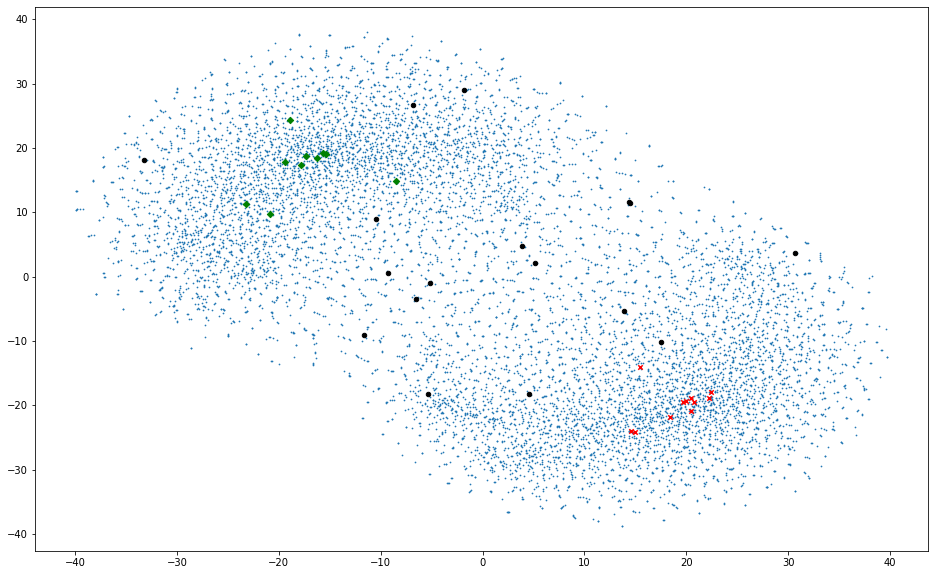

In [137]:
plt.figure(figsize=(16,10))
plt.scatter(embed_2d_tsne[:,0], embed_2d_tsne[:,1], s=0.5)
for palabra in palabras_malas:
  plt.scatter(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1], c='r', s=20, marker='x')
for palabra in palabras_buenas:
  plt.scatter(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1], c='g', s=20, marker='D')
for palabra in palabras_neutras:
  plt.scatter(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1], c='k', s=20)
plt.show()

# Graficar con TruncatedSVD

In [138]:
TSVD = TruncatedSVD(2)

In [139]:
embed_2d = TSVD.fit_transform(embeddings)

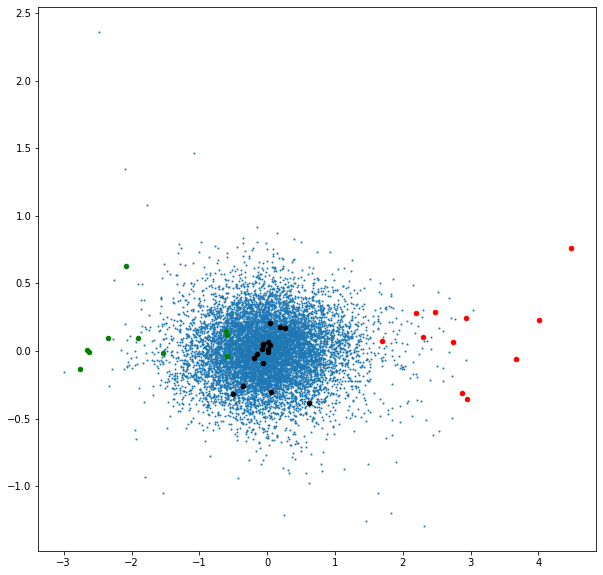

In [140]:
plt.figure(figsize=(10,10))
plt.scatter(embed_2d[:,0], embed_2d[:,1], s=1)
for palabra in palabras_malas:
  plt.scatter(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1], c='r', s=20)
for palabra in palabras_buenas:
  plt.scatter(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1], c='g', s=20)
for palabra in palabras_neutras:
  plt.scatter(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1], c='k', s=20)
plt.show()